In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [56]:
df = pd.read_csv('../TASK1/df_after_dp.csv', parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187534 entries, 0 to 187533
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       187534 non-null  datetime64[ns]
 1   state                      187534 non-null  object        
 2   city_or_county             187534 non-null  object        
 3   latitude                   187534 non-null  float64       
 4   longitude                  187534 non-null  float64       
 5   congressional_district     187534 non-null  int64         
 6   avg_age_participants       128775 non-null  float64       
 7   n_participants_child       187534 non-null  int64         
 8   n_participants_teen        187534 non-null  int64         
 9   n_females                  187534 non-null  float64       
 10  n_killed                   187534 non-null  float64       
 11  n_injured                  187534 non-null  float64 

In [57]:
#check if there is any null value
df.isnull().values.any()

True

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187534 entries, 0 to 187533
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       187534 non-null  datetime64[ns]
 1   state                      187534 non-null  object        
 2   city_or_county             187534 non-null  object        
 3   latitude                   187534 non-null  float64       
 4   longitude                  187534 non-null  float64       
 5   congressional_district     187534 non-null  int64         
 6   avg_age_participants       128775 non-null  float64       
 7   n_participants_child       187534 non-null  int64         
 8   n_participants_teen        187534 non-null  int64         
 9   n_females                  187534 non-null  float64       
 10  n_killed                   187534 non-null  float64       
 11  n_injured                  187534 non-null  float64 

From the previous steps we decided to analyse the incidents from 2014 to 2017, so we don't need to filter the elements.

In [59]:
#Extracting the week number from the date
df["week_number"] = df["date"].dt.isocalendar().week

Group the filtered dataset by city and week, and count the number of incidents in each group.

In [60]:
counts = df.groupby(['city_or_county', 'week_number']).size().reset_index(name='count')


In [61]:
counts

,city_or_county,week_number,count
0,Abbeville,2,1
1,Abbeville,3,1
2,Abbeville,6,1
3,Abbeville,7,1
4,Abbeville,8,2
...,...,...,...
65788,Zionville,44,1
65789,Zumbro Falls,27,1
65790,Zuni (Zuni Pueblo),33,1
65791,Zwolle,15,1


In [62]:
city_counts = counts.groupby('city_or_county')['week_number'].nunique().reset_index(name='weeks')
city_counts

,city_or_county,weeks
0,Abbeville,20
1,Abbotsford,1
2,Abbott,1
3,Abbottstown,1
4,Aberdeen,30
...,...,...
11578,Zionville,1
11579,Zumbro Falls,1
11580,Zuni (Zuni Pueblo),1
11581,Zwolle,1


In [63]:
weeks_lower_bound = 0.15 * 4 * 52
cities_filtered = city_counts[city_counts['weeks'] > weeks_lower_bound]['city_or_county']
cities_filtered

5            Abilene
48             Aiken
55             Akron
71            Albany
82       Albuquerque
            ...     
11495         Yakima
11526        Yonkers
11528           York
11542     Youngstown
11548      Ypsilanti
Name: city_or_county, Length: 484, dtype: object

In [64]:
counts = counts[counts['city_or_county'].isin(cities_filtered)]
counts

,city_or_county,week_number,count
53,Abilene,1,7
54,Abilene,2,3
55,Abilene,3,1
56,Abilene,4,3
57,Abilene,5,4
...,...,...,...
65619,Ypsilanti,48,1
65620,Ypsilanti,49,2
65621,Ypsilanti,50,1
65622,Ypsilanti,51,1


Compute a score for each city and week by dividing the number of incidents by the total number of weeks in the 4-year period.


In [65]:
counts['score'] = counts['count'] / (4 * 52)

/var/folders/9b/4rjbcrys1931nh3fmqsfh8740000gn/T/ipykernel_35217/1309826083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['score'] = counts['count'] / (4 * 52)


In [76]:
#detrend the data
counts_de_trended = counts.copy()
counts_de_trended['score'] = counts_de_trended['score'] / counts_de_trended['week_number']

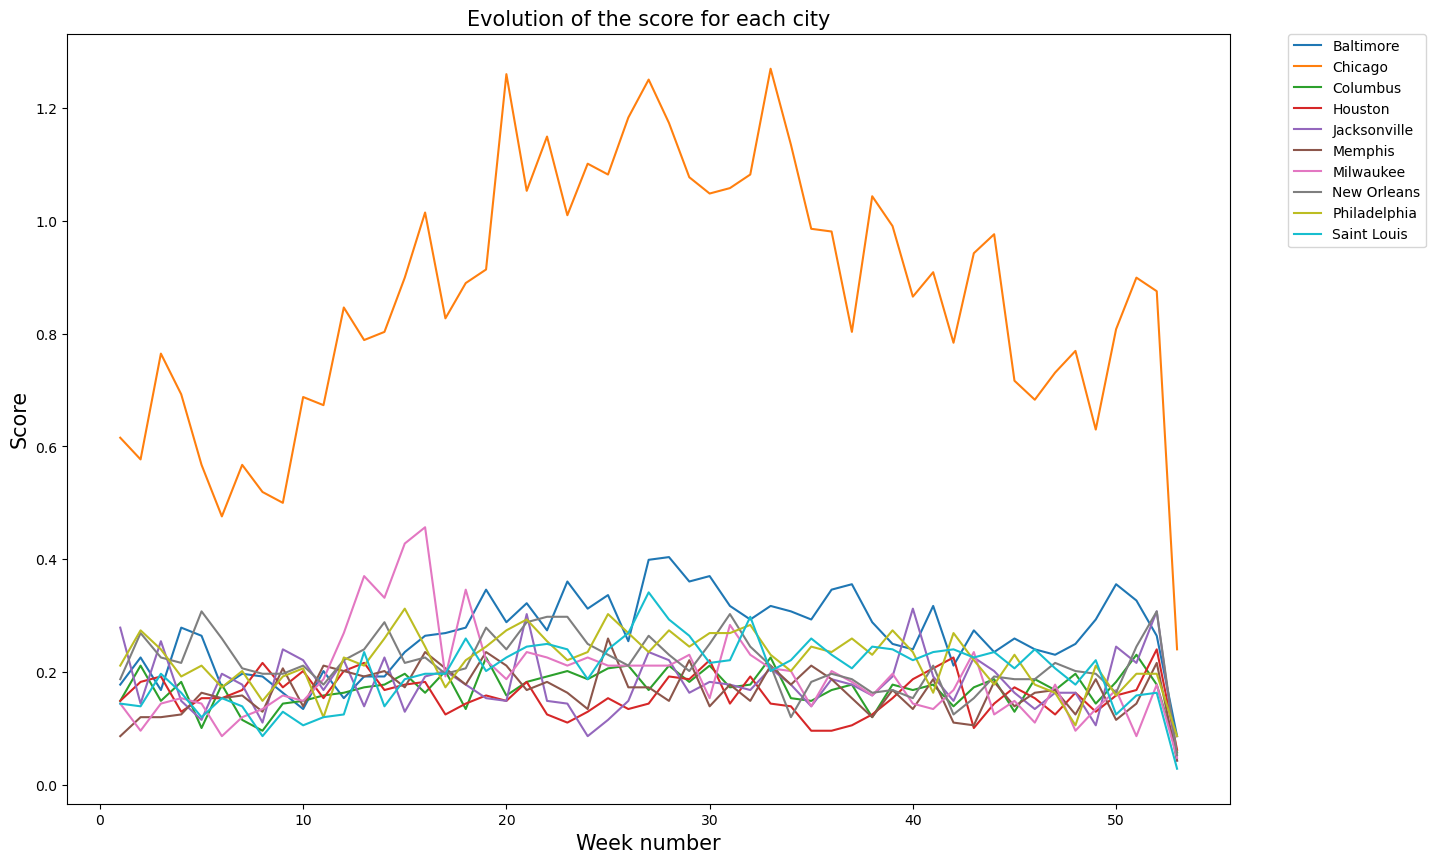

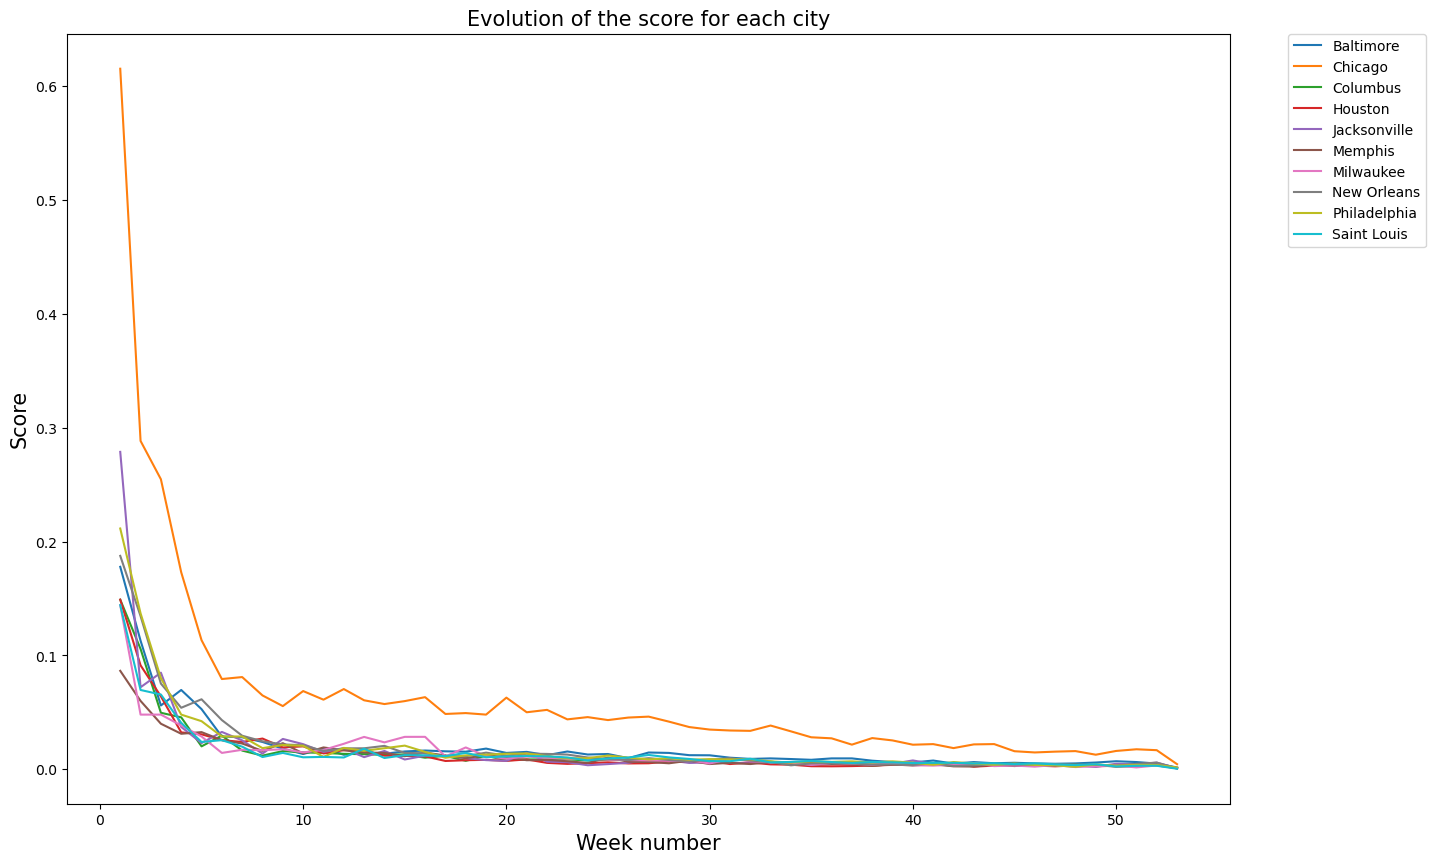

In [77]:
#Extract a time series for each city, computing for each week of the 4 years a score

#Cities to plot in the graph, only the top 10
cities_to_plot = counts.groupby('city_or_county')['score'].sum().sort_values(ascending=False).head(10).index
counts_to_plot = counts[counts['city_or_county'].isin(cities_to_plot)]
counts_de_trended = counts_de_trended[counts_de_trended['city_or_county'].isin(cities_to_plot)]


plt.figure(figsize=(15,10))
sns.lineplot(data=counts_to_plot, x="week_number", y="score", hue="city_or_county")
plt.title("Evolution of the score for each city", fontsize=15)
plt.xlabel("Week number", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


plt.figure(figsize=(15,10))
sns.lineplot(data=counts_de_trended, x="week_number", y="score", hue="city_or_county")
plt.title("Evolution of the score for each city", fontsize=15)
plt.xlabel("Week number", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()